# Imports

In [2]:
#IMPORTS 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold



import warnings
warnings.filterwarnings("ignore")

sns.set_style("whitegrid")
sns.set_theme(rc={'figure.figsize':(8,6)})

# Dataset Description

The data consists of passenger records from the **Titanic** disaster. The main objective is to predict whether each passenger in the test set survived. The dataset is divided into three files:

### Files
- **train.csv** - Contains records for passengers with the target variable `Survived`, indicating whether each passenger survived (1) or not (0).
- **test.csv** - Contains records for passengers whose survival status needs to be predicted.
aggle.

---

### Columns in train.csv and test.csv

| Column         | Description                                                                                             |
|----------------|---------------------------------------------------------------------------------------------------------|
| **PassengerId**| Unique identifier for each passenger.                                                                   |
|   *Survived**  | Target variable (1 = survived, 0 = don't survive).                                                       |
| **Pclass**     | Ticket class (1 = 1st class, 2 = 2nd class, 3 = 3rd class).                                             |
| **Name**       | The name of the passenger.                                                                              |
| **Sex**        | The gender of the passenger (`male` or `female`).                                                       |
| **Age**        | The age of the passenger in years.                                                                      |
| **SibSp**      | Number of siblings or spouses aboard the Titanic.                                                       |
| **Parch**      | Number of parents or children aboard the Titanic.                                                       |
| **Ticket**     | Ticket number.                                                                                          |
| **Fare**       | The amount of money paid for the ticket.                                                                |
| **Cabin**      | Cabin number. Some values may be missing.                                                               |
| **Embarked**   | Port of embarkation (`C` = Cherbourg, `Q` = Queenstown, `S` = Southampton).                             |

---

### Sample Submission Format

- **PassengerId** - The unique identifier for each passenger in the test set.
- **Survived** - Your prediction for each passenger, either `1` (survived) or `0` (did not survive).

Each row in your submission should match the following format:

| PassengerId | Survived |
|-------------|----------|
| 892         | 0        |
| 893         | 1        |
| ...         | ...      |


# Loading and undestanding data

We begin by loading the training and test datasets from the CSV files into pandas DataFrames.

In [4]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [174]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [175]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [176]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [177]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Exploratory Data Analysis

## 1. Survival Distribution



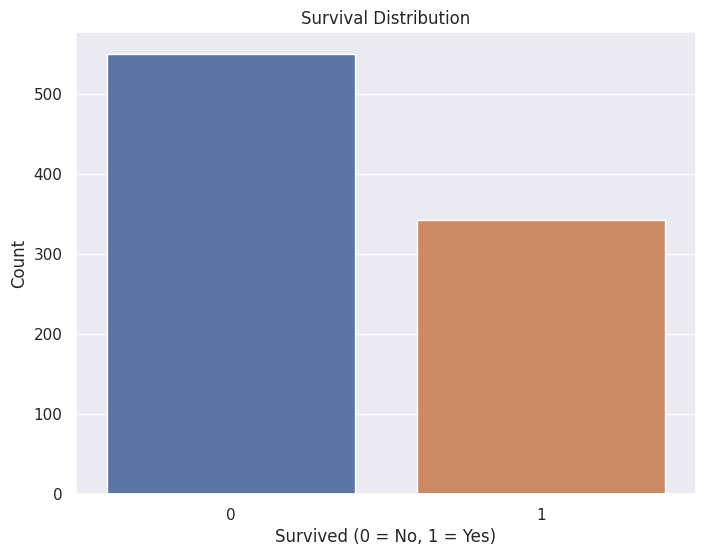

In [178]:
sns.countplot(x='Survived', data=train)
plt.title("Survival Distribution")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

### Conclusion: Survival Distribution

From the bar plot showing the survival distribution, we observe the following:

- The majority of passengers **did not survive** the Titanic disaster, with more than 500 passengers classified as non-survivors (`Survived = 0`).
- A significantly smaller proportion of passengers **survived** the disaster, with fewer than 300 passengers classified as survivors (`Survived = 1`).

## 2. Pclass 

In [179]:
train[["Pclass","Survived"]].groupby(by="Pclass",as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


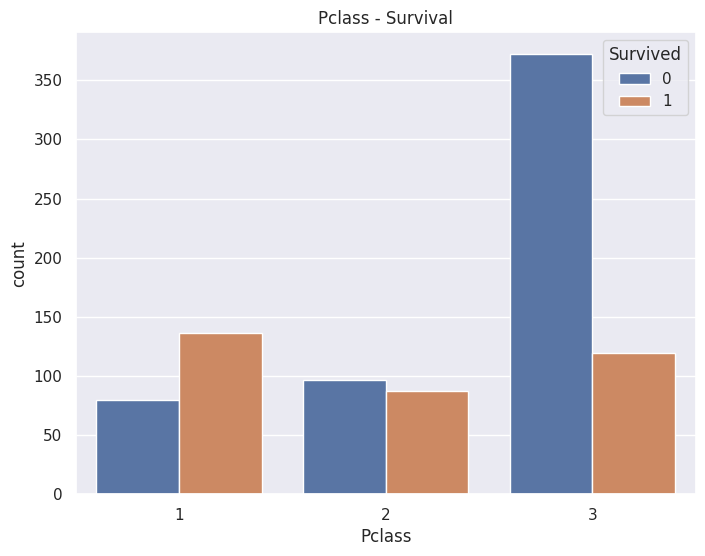

In [180]:
sns.countplot(x='Pclass', data=train,hue="Survived")
plt.title("Pclass - Survival")
plt.show()

### Conclusion

From the analysis of survival rates by passenger class (`Pclass`), we can make the following observations:

- **1st class passengers** had the highest survival rate, with approximately 63% of them surviving the Titanic disaster.
- **2nd class passengers** had a lower survival rate, around 47%.
- **3rd class passengers** had the lowest survival rate, with only about 24% surviving.

This suggests that **passenger class** was a significant factor influencing survival, with higher-class passengers having better chances of survival. This could be due to factors such as proximity to lifeboats and prioritization in evacuation procedures.

## 3. Sex

In [181]:
train[["Sex","Survived"]].groupby(by="Sex",as_index=True).mean()

,Survived
Sex,
female,0.742038
male,0.188908


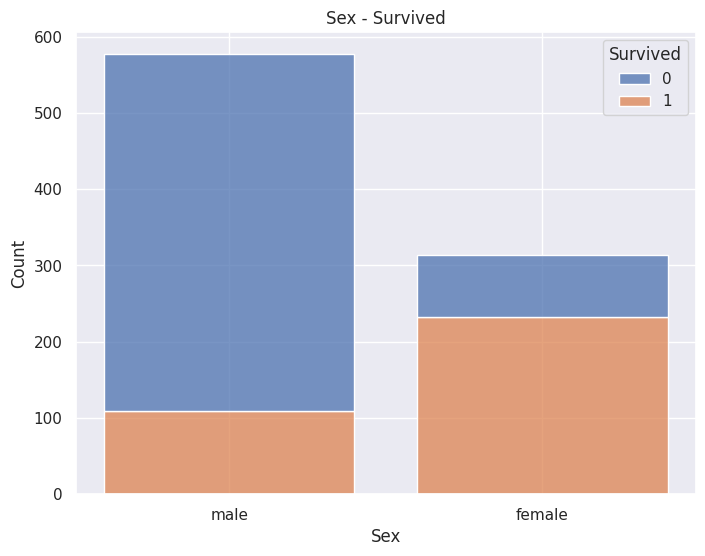

In [182]:
sns.histplot(data=train, x='Sex', hue='Survived', multiple='stack', shrink=0.8)
plt.title("Sex - Survived")
plt.show()

### Conclusion

From the analysis of survival rates by gender (`Sex`), we observe the following:

- **Females** had a significantly higher survival rate (74%) compared to **males**, who had a survival rate of only 19%.
- This suggests that gender was an important factor influencing survival, with females having a much higher chance of survival during the Titanic disaster.

## 4. Embarked

In [183]:
train["Embarked"].fillna(train["Embarked"].mode()[0],inplace=True)

In [184]:
train[["Embarked","Survived"]].groupby(by="Embarked",as_index=True).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


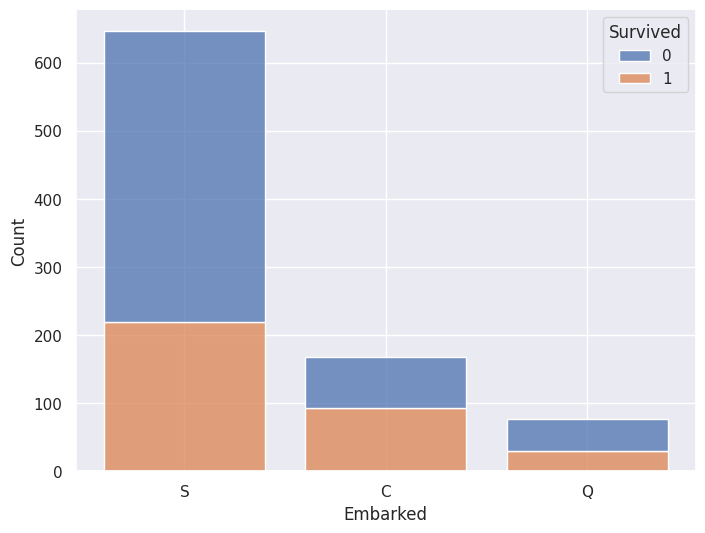

In [185]:
sns.histplot(data=train, x='Embarked', hue='Survived', multiple='stack', shrink=0.8)
plt.show()

### Conclusion: Survival by Embarked

From the analysis of survival rates based on the embarkation point (`Embarked`), we observe the following:

- **C (Cherbourg)** passengers had the highest survival rate at approximately **55.4%**.
- **Q (Queenstown)** passengers had a moderate survival rate of about **38.9%**.
- **S (Southampton)** passengers had the lowest survival rate at around **33.9%**.

These differences in survival rates suggest that the **embarkation point** might have been an important factor in determining survival, with passengers boarding at **Cherbourg** having a higher chance of survival compared to those boarding at **Southampton** or **Queenstown**.

## 5. Cabin

In [186]:
print(f"Survival rate of people with cabin: {train[train['Cabin'].notna()]['Survived'].mean()*100:.2f}%")
print(f"Survival rate of people without cabin: {train[train['Cabin'].isna()]['Survived'].mean()*100:.2f}%")

Survival rate of people with cabin: 66.67%
Survival rate of people without cabin: 29.99%


In [187]:
print(train["Cabin"].str[0].fillna("Z").value_counts(),"\n")
print(test["Cabin"].str[0].fillna("Z").value_counts())

Cabin
Z    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64 

Cabin
Z    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: count, dtype: int64


In [188]:
train.groupby(train["Cabin"].str[0].fillna("Z"))["Survived"].mean().sort_values(ascending=False)

Cabin
D    0.757576
E    0.750000
B    0.744681
F    0.615385
C    0.593220
G    0.500000
A    0.466667
Z    0.299854
T    0.000000
Name: Survived, dtype: float64

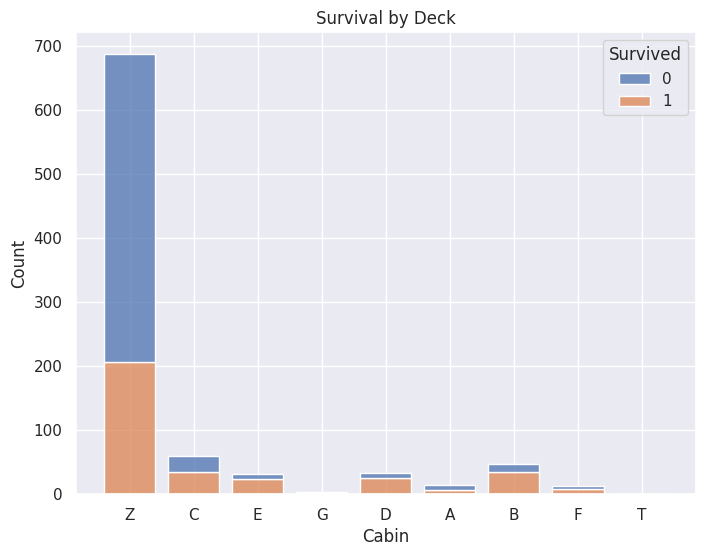

In [189]:
sns.histplot(data=train, x=train["Cabin"].str[0].fillna("Z"), hue='Survived', multiple='stack', shrink=0.8, 
             discrete=True)
plt.title("Survival by Deck")
plt.show()


### Conclusion

Based on the analysis of survival rates for passengers grouped by the first letter of their cabin (representing the deck), we can observe the following:

- **D Deck**: Highest survival rate at **75.8%**.
- **E Deck**: Survival rate of **75.0%**.
- **B Deck**: Survival rate of **74.5%**.
- **F Deck**: Relatively high survival rate at **61.5%**.
- **C Deck**: Survival rate of **59.3%**.
- **G Deck**: Survival rate of **50.0%**.
- **A Deck**: Lower survival rate of **46.7%**.
- **Z Deck** (passengers without a cabin): Significantly lower survival rate of **29.9%**.
- **T Deck**: Lowest survival rate at **0%**, with only one passenger.

#### Additional Insights:
- Passengers with a cabin (non-`NaN` values in the `Cabin` column) had a higher survival rate (**66.7%**) compared to those without a cabin (**29.9%**).
- Survival rates vary significantly across different decks, with **D**, **E**, and **B** decks having the highest chances of survival.

These findings suggest that cabin location or the presence of a cabin might have influenced survival chances, potentially due to factors such as proximity to lifeboats or the sequence of evacuation.


## 6. Sibsp

In [190]:
train[["SibSp","Survived"]].groupby(by="SibSp",as_index=True).mean().sort_values(by="Survived",ascending = False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


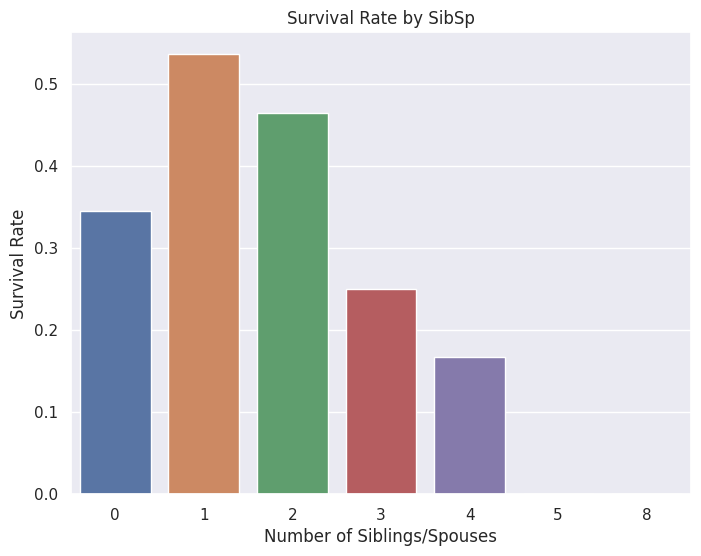

In [191]:
sns.barplot(x='SibSp', y='Survived', data=train, ci=None)
plt.title("Survival Rate by SibSp")
plt.xlabel("Number of Siblings/Spouses")
plt.ylabel("Survival Rate")
plt.show()

### Conclusion

From the analysis of survival rates by the number of siblings/spouses a passenger had onboard, the following trends emerge:

- Passengers with **1 sibling/spouse** had the highest survival rate at **53.6%**.
- Those with **2 siblings/spouses** had a survival rate of **46.4%**, which is slightly lower but still relatively high.
- Passengers traveling **alone (0 siblings/spouses)** had a survival rate of **34.5%**.
- Survival rates drop significantly as the number of siblings/spouses increases:
  - **3 siblings/spouses**: Survival rate of **25.0%**.
  - **4 siblings/spouses**: Survival rate of **16.7%**.
  - **5 siblings/spouses**: Survival rate of **0%**.
  - **8 siblings/spouses**: Survival rate of **0%**.

### Key Insights:
1. Having **1 or 2 siblings/spouses onboard** was associated with higher survival rates.
2. Passengers traveling **alone** had a moderate survival rate, but their chances were notably lower than those with 1 or 2 family members.
3. Passengers with **large families (3 or more siblings/spouses)** had significantly lower survival rates, possibly due to challenges in coordinating or assisting larger groups during evacuation.

These observations suggest that smaller family groups were better able to navigate survival efforts, while larger families faced greater difficulties.


## 7. Parch

In [192]:
train[["Parch","Survived"]].groupby(by="Parch",as_index=True).mean().sort_values(by="Survived",ascending = False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


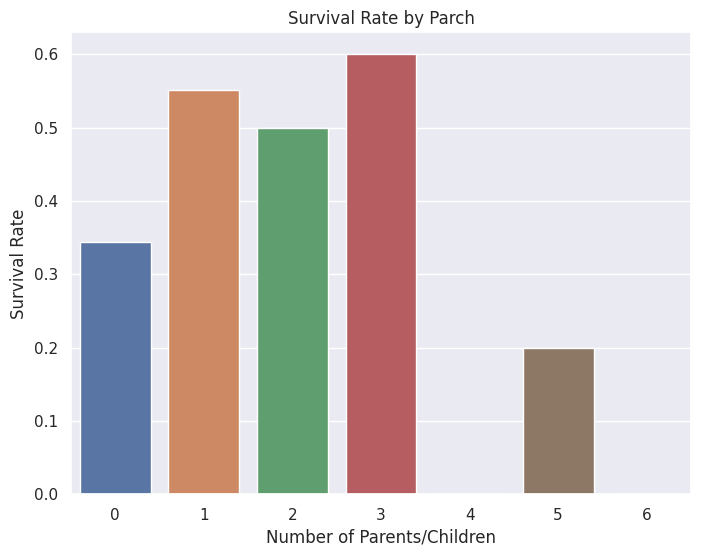

In [193]:
sns.barplot(x='Parch', y='Survived', data=train, ci=None)
plt.title("Survival Rate by Parch")
plt.xlabel("Number of Parents/Children")
plt.ylabel("Survival Rate")
plt.show()

### Conclusion: 

- Passengers with **1 to 3 parents/children** had higher survival rates, peaking at **60.0%** for those with **3 parents/children**.
- Those traveling **alone (Parch = 0)** had a lower survival rate of **34.4%**.
- Passengers with **4 or more parents/children** had drastically lower survival rates, with **no survival for 4 or 6 parents/children**.

### Key Insight
Similar to the `SibSp` analysis, smaller family groups had better survival rates, while being alone or in very large families reduced survival chances.

### Future Steps 
**1.Feature Engineering** Combining `SibSp` and `Parch` into a single feature like `FamilySize` could better capture the impact of family structure on survival and improve model performance.


## 8. Age

In [194]:
train.Age.isna().sum()


177

In [195]:
test.Age.isna().sum()

86

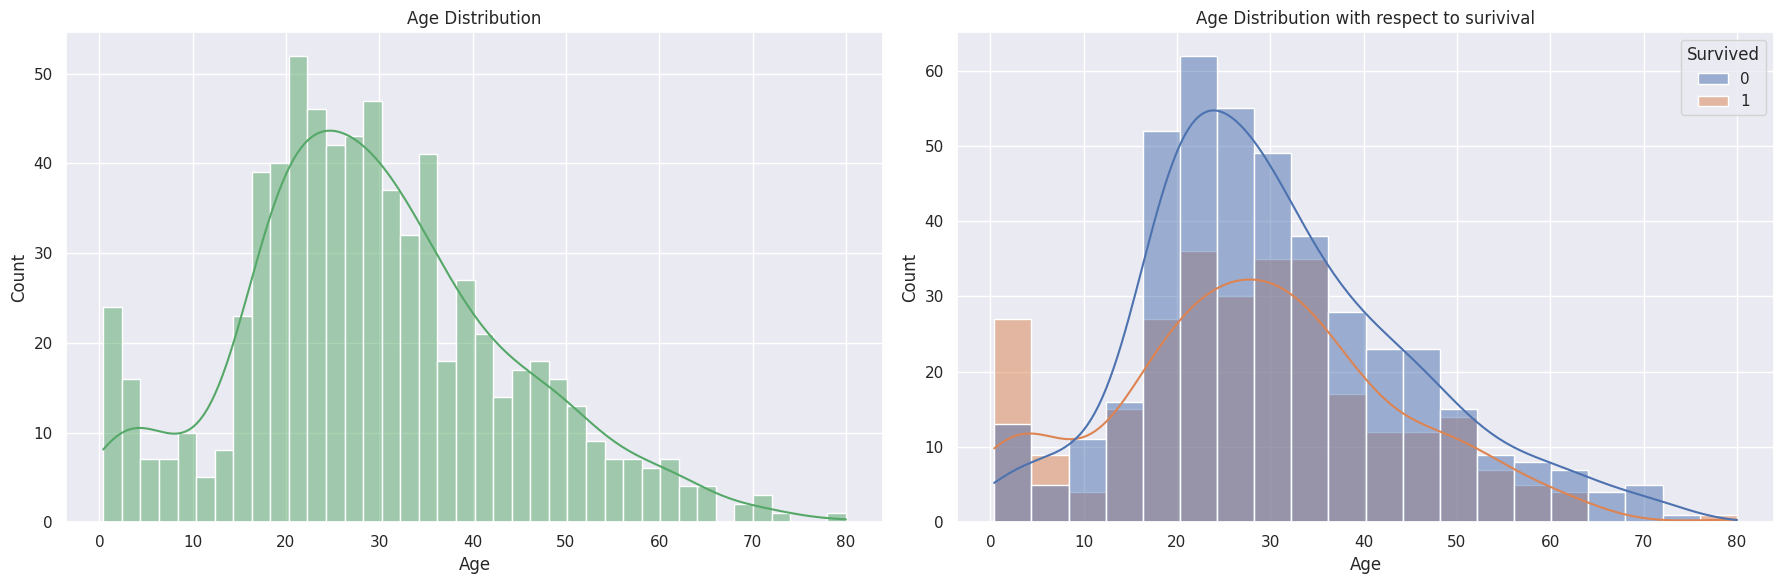

In [196]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

plt.subplot(121)
sns.histplot(train,x="Age",kde=True,color="g",bins=40)
plt.title("Age Distribution")

plt.subplot(122)
sns.histplot(train,x="Age",kde=True,hue="Survived",bins=20)
plt.title("Age Distribution with respect to surivival")

plt.tight_layout()
plt.show()

In [197]:
train.corr(numeric_only=True)["Age"].sort_values()

Pclass        -0.369226
SibSp         -0.308247
Parch         -0.189119
Survived      -0.077221
PassengerId    0.036847
Fare           0.096067
Age            1.000000
Name: Age, dtype: float64

### Conclusion:

### Missing Values
- **Age** has **177 missing values** in the training set and **86 missing values** in the test set. 

### Key Insight
1. The distribution of `Age` is approximately normal but skewed slightly toward younger passengers.
2. Survival rates vary significantly across different age groups, as shown in the second plot:
   - Younger passengers tend to have higher survival rates.
   - Older passengers have lower survival rates but there's more records.

### Future Steps
1. **Imputation**: Missing values in the `Age` column will be imputed to ensure the dataset is complete.
2. **Feature Engineering**: Age could be categorized into subsets to capture its relationship with survival.


## 9. Fare 

In [198]:
train.Fare.isna().sum()

0

In [199]:
test.Fare.isna().sum()

1

-In the next steps we can impute that missing value in simple way like **mean()** because there is only one missing record

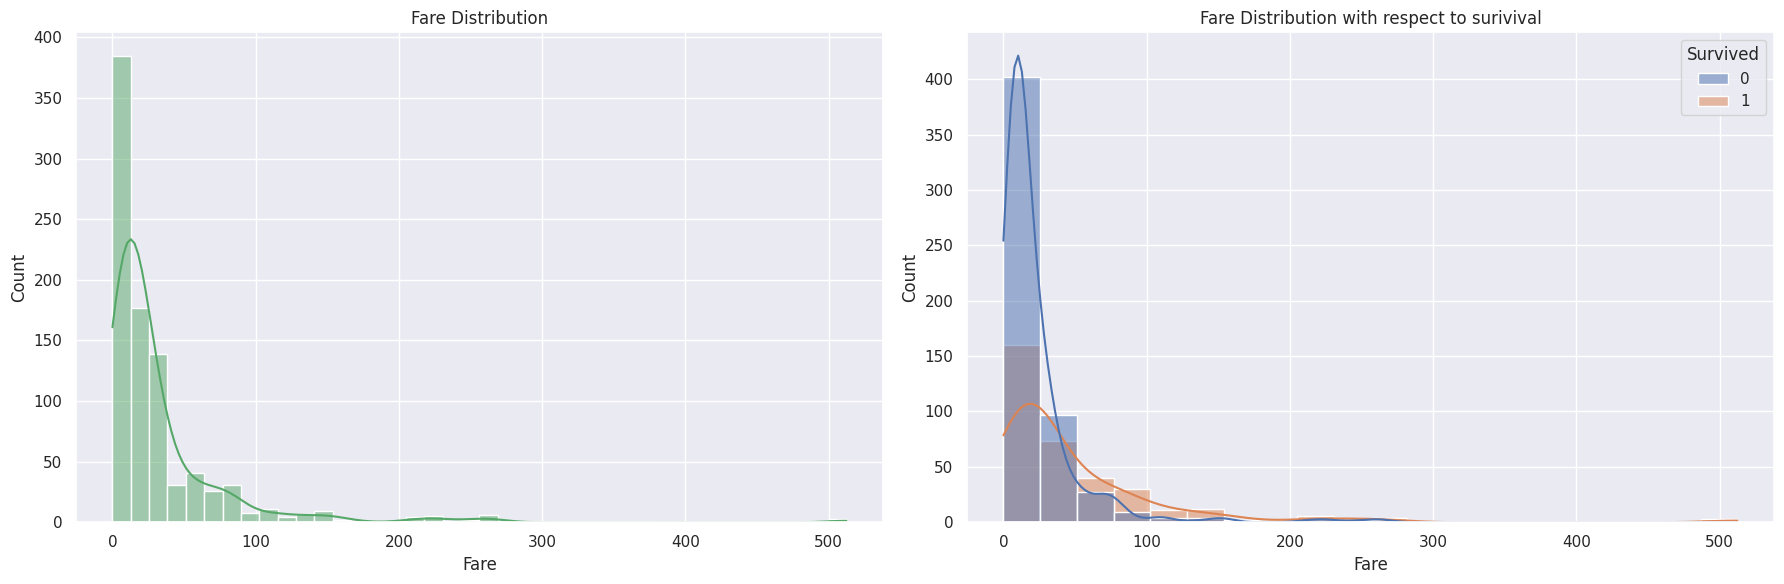

In [200]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

plt.subplot(121)
sns.histplot(train,x="Fare",kde=True,color="g",bins=40)
plt.title("Fare Distribution")

plt.subplot(122)
sns.histplot(train,x="Fare",kde=True,hue="Survived",bins=20)
plt.title("Fare Distribution with respect to surivival")

plt.tight_layout()
plt.show()

### Conclusion:

- **Fare** values are heavily skewed, with most passengers paying relatively low fares, as shown in the distribution plot.
- **Higher fares** are generally associated with a **higher survival rate**.

### Key Insight
Fare appears to be a strong indicator of survival, possibly reflecting the passenger's class and access to better safety measures during the disaster.

### Future Steps
- **Feature Engineering**: Divide `Fare` into subsets or bins (e.g., low, medium, high) to better capture the relationship between fare and survival in th
he model.


## 10. Name

In [201]:
train["Name"].head(15)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
Name: Name, dtype: object

In [202]:
combine = [train,test]
for df in combine:
     print(df.Name.str.extract(' ([A-Za-z]+)\.', expand=False).value_counts())


Name
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64
Name
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64


### Conclusion

- We extracted **titles** from passenger names, revealing a variety of titles such as `Mr`, `Miss`, `Mrs`, `Master`, and less common ones like `Countess`, `Sir`, and `Lady`.
- The most frequent titles include:
  - `Mr`: 517 occurrences in the training set, 240 in the test set.
  - `Miss`: 182 occurrences in the training set, 78 in the test set.
  - `Mrs`: 125 occurrences in the training set, 72 in the test set.
  - `Master`: 40 occurrences in the training set, 21 in the test set.

### Future Steps
- **Title Mapping**: Group titles based on their occurrences to simplify analysis.
- **Survival Rate Analysis**: Check if survival rates differ significantly by title, which could help identify its importance as a feature.


# Imputing Missing Values

## 1. Imputing Nan's in Age


In [203]:
features = ["Pclass", "SibSp", "Parch","Age"] 
combined = pd.concat([train[features], test[features]], axis=0)
imputer = IterativeImputer(max_iter=10,estimator=KNeighborsRegressor(n_neighbors=5))
imputer.fit(combined)

IterativeImputer(estimator=KNeighborsRegressor())

In [204]:
train[features] = imputer.transform(train[features])
test[features] = imputer.transform(test[features])

In [205]:
print(train.isna().sum(),"\n")
print(test.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


- Used **Iterative Imputer** to impute missing values for `Age`.
- Correlated features such as `Pclass`, `SibSp`, `Parch`, were included in the imputation process to improve the accuracy of missing `Age` values.
- Successfully filled all missing values in these features for both training and test datasets.
- Remaining missing values are only in the `Cabin` feature, which will be addressed in subsequent steps.ps.


## 2. Imputing Nan's in Cabin

In [206]:
train["Cabin"].fillna("Z",inplace=True)
test["Cabin"].fillna("Z",inplace=True)
print(train.isna().sum(),"\n")
print(test.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64 

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64


## 3. Imputing Nan's in Fare

In [207]:
test.loc[test["Fare"].isna(), "Fare"] = test["Fare"].median()

In [208]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Feature Engineering

## 1. Deck

Let's extract the first letter of the Cabin column in the training and test dataset to create the Deck column.

In [209]:
train["Deck"] = train["Cabin"].str[0]
test["Deck"] = test["Cabin"].str[0]

In [210]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.000,1.0,0.0,A/5 21171,7.2500,Z,S,Z
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1.0,0.0,PC 17599,71.2833,C85,C,C
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.000,0.0,0.0,STON/O2. 3101282,7.9250,Z,S,Z
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1.0,0.0,113803,53.1000,C123,S,C
4,5,0,3.0,"Allen, Mr. William Henry",male,35.000,0.0,0.0,373450,8.0500,Z,S,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2.0,"Montvila, Rev. Juozas",male,27.000,0.0,0.0,211536,13.0000,Z,S,Z
887,888,1,1.0,"Graham, Miss. Margaret Edith",female,19.000,0.0,0.0,112053,30.0000,B42,S,B
888,889,0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,12.634,1.0,2.0,W./C. 6607,23.4500,Z,S,Z
889,890,1,1.0,"Behr, Mr. Karl Howell",male,26.000,0.0,0.0,111369,30.0000,C148,C,C


The value "T" in the Deck column of the training dataset is replaced with "Z" because as could be seen before, there is no Deck "T" in the test dataset. 

In [211]:
train.loc[train["Deck"] == "T", "Deck"] = "Z"

In [212]:
train[train["Deck"]=="T"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck


## 2. FamilySize

Let's create a new column FamilySize in the training and test dataset by adding the number of siblings/spouses (SibSp) and parents/children (Parch), plus 1 to include the individual passenger.

In [213]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [214]:
train[["FamilySize","Survived"]].groupby("FamilySize").mean()

,Survived
FamilySize,
1.0,0.303538
2.0,0.552795
3.0,0.578431
4.0,0.724138
5.0,0.200000
6.0,0.136364
7.0,0.333333
8.0,0.000000
11.0,0.000000


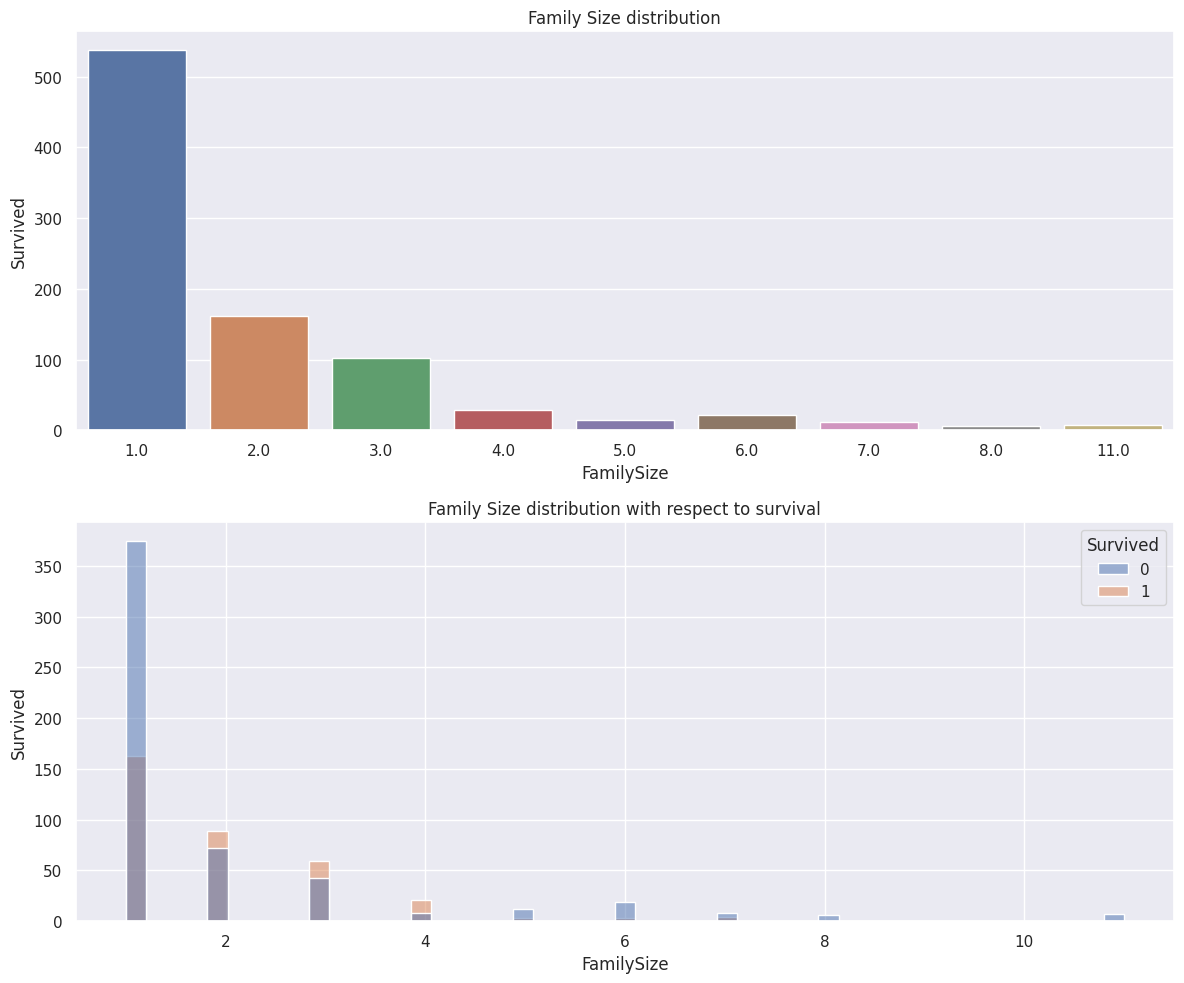

In [215]:
fig, ax = plt.subplots(2,1,figsize=(12, 10))

plt.subplot(211)
sns.countplot(train,x="FamilySize")
plt.title("Family Size distribution")
plt.ylabel("Survived")

plt.subplot(212)
sns.histplot(train,x="FamilySize",hue="Survived")
plt.title("Family Size distribution with respect to survival")
plt.ylabel("Survived")

plt.tight_layout()
plt.show()

This categorizes passengers into FamilyCategory based on FamilySize: "Solo" for individuals, "Small" for families of 2–4, "Large" for families of 5 or more, and "Unknown" for any undefined cases.

In [216]:
for df in combine:
    df["FamilyCategory"] = df["FamilySize"].apply(
        lambda x: "Solo" if x == 1 else 
                  "Small" if 2 <= x <= 4 else 
                  "Large" if x >= 5 else 
                  "Unknown"
    )

In [217]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,FamilyCategory
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.000,1.0,0.0,A/5 21171,7.2500,Z,S,Z,2.0,Small
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1.0,0.0,PC 17599,71.2833,C85,C,C,2.0,Small
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.000,0.0,0.0,STON/O2. 3101282,7.9250,Z,S,Z,1.0,Solo
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1.0,0.0,113803,53.1000,C123,S,C,2.0,Small
4,5,0,3.0,"Allen, Mr. William Henry",male,35.000,0.0,0.0,373450,8.0500,Z,S,Z,1.0,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2.0,"Montvila, Rev. Juozas",male,27.000,0.0,0.0,211536,13.0000,Z,S,Z,1.0,Solo
887,888,1,1.0,"Graham, Miss. Margaret Edith",female,19.000,0.0,0.0,112053,30.0000,B42,S,B,1.0,Solo
888,889,0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,12.634,1.0,2.0,W./C. 6607,23.4500,Z,S,Z,4.0,Small
889,890,1,1.0,"Behr, Mr. Karl Howell",male,26.000,0.0,0.0,111369,30.0000,C148,C,C,1.0,Solo


## 3. AgeBand

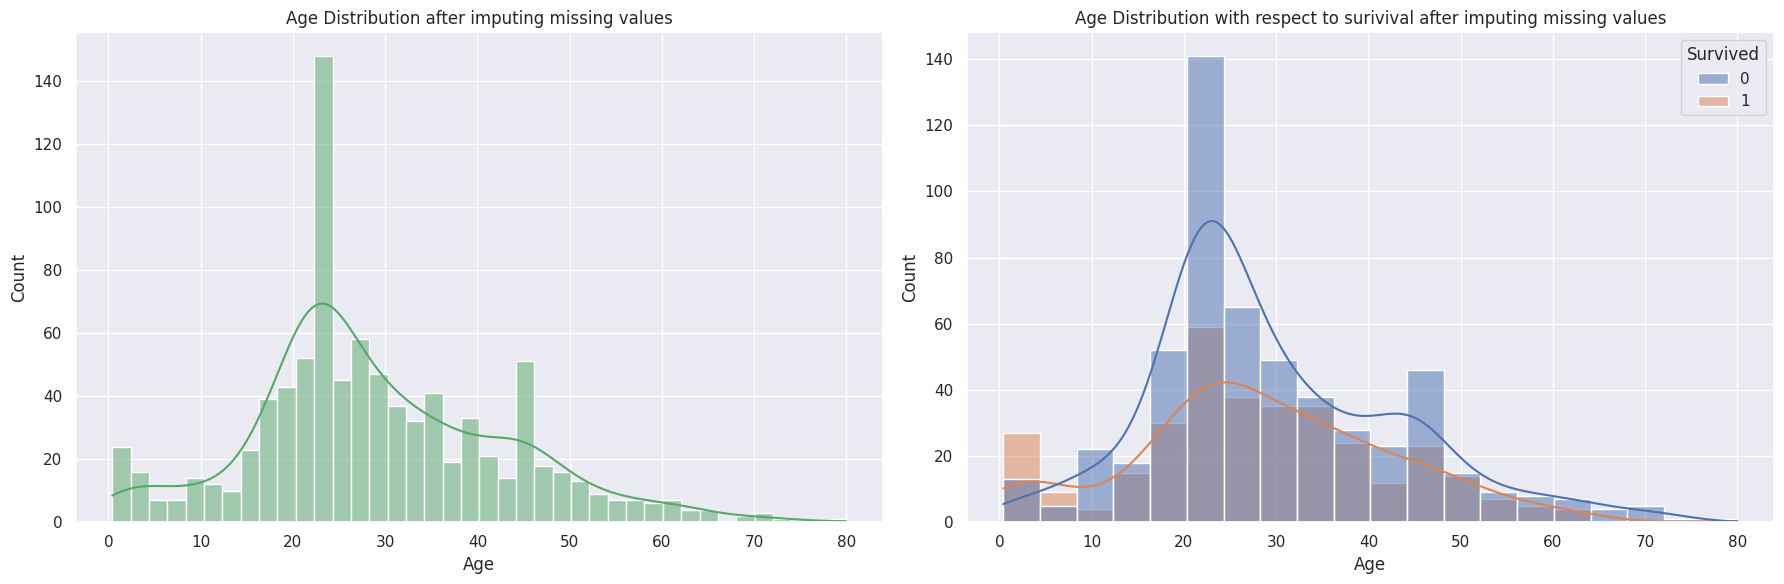

In [218]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

plt.subplot(121)
sns.histplot(train,x="Age",kde=True,color="g",bins=40)
plt.title("Age Distribution after imputing missing values")

plt.subplot(122)
sns.histplot(train,x="Age",kde=True,hue="Survived",bins=20)
plt.title("Age Distribution with respect to surivival after imputing missing values")

plt.tight_layout()
plt.show()

Let's create an AgeBand column in both the training and test datasets by grouping ages into categories: "Child" (0–10), "Teenager" (11–20), "Adult" (21–60), and "Senior" (61–90), using predefined bins.

In [219]:
train["AgeBand"] = pd.cut(train["Age"],bins = [-1,10,20,60,90], labels =["Child","Teenager","Adult","Senior"])
test["AgeBand"] = pd.cut(test["Age"],bins = [-1,10,20,60,90], labels =["Child","Teenager","Adult","Senior"])

In [220]:
train[["AgeBand","Survived"]].groupby("AgeBand").mean()

,Survived
AgeBand,
Child,0.558824
Teenager,0.370079
Adult,0.373887
Senior,0.227273


The table shows that younger passengers, such as "Children" (55.88%), have higher survival rates, while "Seniors" have the lowest survival rate at 22.73%, with "Teenagers" and "Adults" having similar survival rates around 37%.

## 4. FareBand

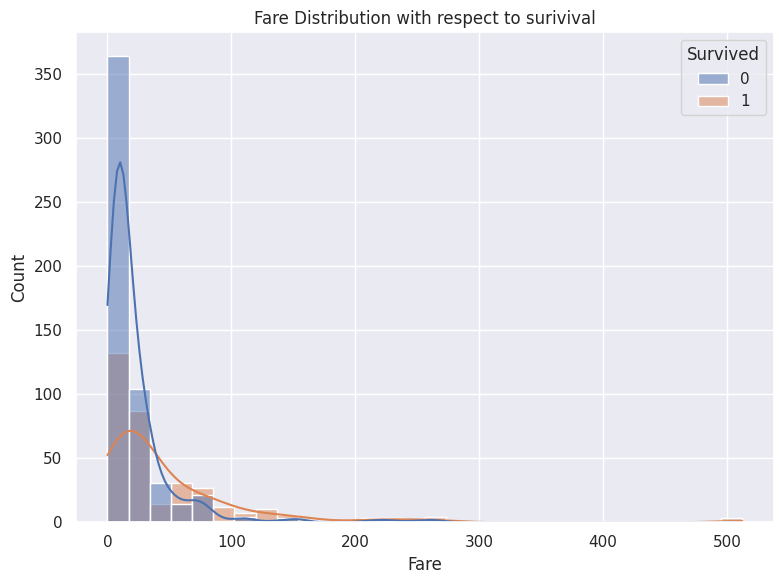

In [221]:
sns.histplot(train,x="Fare",kde=True,hue="Survived",bins=30)
plt.title("Fare Distribution with respect to surivival")

plt.tight_layout()
plt.show()

Let's do the similar thing for Fare as in the Age, because from the plot above we can see that it can also be easily categorized.

In [222]:
train["FareBand"] = pd.cut(train["Fare"],bins = [-1,1,16,50,600], labels =["Nothing","Low","Medium","High"])
test["FareBand"] = pd.cut(test["Fare"],bins = [-1,1,16,50,600], labels =["Nothing","Low","Medium","High"])

In [223]:
train[["FareBand","Survived"]].groupby("FareBand").mean()

,Survived
FareBand,
Nothing,0.066667
Low,0.270213
Medium,0.426829
High,0.681250


The table shows that passengers in higher fare bands, such as "High" (68.13%) and "Medium" (42.68%), have significantly higher survival rates compared to those in lower fare bands, with "Nothing" having the lowest survival rate at 6.67%.

## 5. Title

Now, let's extract the title from the passenger's name, categorize uncommon titles as "Rare," and standardize other titles like "Mlle" to "Miss," "Ms" to "Miss," and "Mme" to "Mrs."

In [224]:
for df in combine:
    df["Title"]=df.Name.str.extract(' ([A-Za-z]+)\.', expand=False).replace(['Lady', 'Countess','Capt', 'Col',
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [225]:
train[["Title","Survived"]].groupby("Title").mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


The table shows the average survival rates for different titles, with "Mrs" having the highest survival rate at 79.37%, followed by "Miss" (70.27%), "Master" (57.50%), "Rare" (34.78%), and "Mr" with the lowest survival rate at 15.67%.

## 6. Dropping columns

Let's drop the columns that are not needed for the trainng, such as "Cabin," "SibSp," "Parch," "Ticket," "Name," and "PassengerId" from both the training and test datasets.

In [226]:
id_for_submission = test["PassengerId"]
train = train.drop(["Cabin","SibSp","Parch","Ticket","Name","PassengerId"],axis=1)
test = test.drop(["Cabin","SibSp","Parch","Ticket","Name","PassengerId"],axis=1)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Deck,FamilySize,FamilyCategory,AgeBand,FareBand,Title
0,0,3.0,male,22.0,7.2500,S,Z,2.0,Small,Adult,Low,Mr
1,1,1.0,female,38.0,71.2833,C,C,2.0,Small,Adult,High,Mrs
2,1,3.0,female,26.0,7.9250,S,Z,1.0,Solo,Adult,Low,Miss
3,1,1.0,female,35.0,53.1000,S,C,2.0,Small,Adult,High,Mrs
4,0,3.0,male,35.0,8.0500,S,Z,1.0,Solo,Adult,Low,Mr


## 7. One Hot Encoding

Now, let's apply one-hot encoding to categorical columns like "Pclass", "Sex", "AgeBand", "FareBand", "Embarked", "Deck", "FamilyCategory" and "Title" in both the training and test datasets, dropping the first category to avoid multicollinearity and converting the result to integers.

In [227]:
train = pd.get_dummies(train, columns=['Pclass',"Sex","AgeBand","FareBand","Embarked","Deck","FamilyCategory","Title"],drop_first=True,dtype=int)
test = pd.get_dummies(test, columns=['Pclass',"Sex","AgeBand","FareBand","Embarked","Deck","FamilyCategory","Title"],drop_first=True,dtype=int)


In [228]:
train.columns

Index(['Survived', 'Age', 'Fare', 'FamilySize', 'Pclass_2.0', 'Pclass_3.0',
       'Sex_male', 'AgeBand_Teenager', 'AgeBand_Adult', 'AgeBand_Senior',
       'FareBand_Low', 'FareBand_Medium', 'FareBand_High', 'Embarked_Q',
       'Embarked_S', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F',
       'Deck_G', 'Deck_Z', 'FamilyCategory_Small', 'FamilyCategory_Solo',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare'],
      dtype='object')

In [229]:
test.columns

Index(['Age', 'Fare', 'FamilySize', 'Pclass_2.0', 'Pclass_3.0', 'Sex_male',
       'AgeBand_Teenager', 'AgeBand_Adult', 'AgeBand_Senior', 'FareBand_Low',
       'FareBand_Medium', 'FareBand_High', 'Embarked_Q', 'Embarked_S',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_Z',
       'FamilyCategory_Small', 'FamilyCategory_Solo', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Rare'],
      dtype='object')

## 8. Scaling numerical values 

Let's scale the numerical features, "Age" and "Fare," by scaling them to have a mean of 0 and a standard deviation of 1, using the StandardScaler on both the training and test datasets, to ensure all features are on the same scale and improve model performance.

In [230]:
numerical_features = ["Age", "Fare"]
scaler = StandardScaler()
train[numerical_features]= scaler.fit_transform(train[numerical_features])
test[numerical_features]= scaler.transform(test[numerical_features])
train.head()

,Survived,Age,Fare,FamilySize,Pclass_2.0,Pclass_3.0,Sex_male,AgeBand_Teenager,AgeBand_Adult,AgeBand_Senior,...,Deck_E,Deck_F,Deck_G,Deck_Z,FamilyCategory_Small,FamilyCategory_Solo,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,-0.520449,-0.502445,2.0,0,1,1,0,1,0,...,0,0,0,1,1,0,0,1,0,0
1,1,0.642060,0.786845,2.0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,1,-0.229822,-0.488854,1.0,0,1,0,0,1,0,...,0,0,0,1,0,1,1,0,0,0
3,1,0.424089,0.420730,2.0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0.424089,-0.486337,1.0,0,1,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0


# Cross Validation 

We are separating the features (X) and the target variable (y) from the training dataset and then splitting the data into training and validation sets, using 80% for training and 20% for validation, to evaluate model performance on unseen data.

In [231]:
X = train.drop('Survived', axis=1)
y = train['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

The code below defines a dictionary called models that stores different machine learning algorithms, including RandomForest, GradientBoosting, KNeighbors, XGBoost, and CatBoost. This allows easy access to multiple models for comparison.

It also defines a param_grids dictionary, which holds hyperparameter tuning grids for each model. These grids specify various values for parameters like n_estimators, learning_rate, and max_depth, which will be used for hyperparameter optimization to find the best model configuration.

In [232]:
models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'KNeighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(silent=True)  
}

param_grids = {
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    'GradientBoosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0],
        'min_samples_split': [2, 5, 10]
    },
    'KNeighbors': {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    },
    'CatBoost': { 
        'iterations': [50, 100, 200],
        'depth': [3, 5, 7],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.8, 0.9, 1.0],
        'l2_leaf_reg': [1, 3, 5]
    }
}


The code below trains and tunes multiple machine learning models using `GridSearchCV` with cross-validation.

We begin by initializing an empty dictionary, `best_models`, and two lists: `model_names` and `accuracy_scores`, which will store the results. To ensure that each fold maintains the correct class distribution, we use `StratifiedKFold` with 5 splits.

For each model in the `models` dictionary, we follow these steps:

1. **Print the model name** to indicate which model is currently being trained.
2. **Use `GridSearchCV`** with the specific hyperparameter grid (`param_grids[model_name]`) to find the best combination of parameters for the model.
3. **Fit the model** on the training data (`X_train`, `y_train`).
4. **Save the best model** along with its hyperparameters and the best cross-validation score in the `best_models` dictionary.
5. **Make predictions** on the validation set (`X_val`) and calculate the accuracy, which is then added to the `accuracy_scores` list.

Finally, we print the best parameters and cross-validation scores for each model, and store these values in the `model_names` and `validation_scores` lists.


In [234]:
best_models = {}
model_names = [] 
accuracy_scores = []
validation_scores = []
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

for model_name, model in models.items():
    print(f"Training and tuning {model_name}...")
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], 
                               cv=kfold, n_jobs=-1, verbose=1, scoring='accuracy')
    
    grid_search.fit(X_train, y_train)
    
    best_models[model_name] = {
        'model': grid_search.best_estimator_,
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_
    }

    y_pred = grid_search.best_estimator_.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    print(f"Best Accuracy for {model_name}: {accuracy:.4f}\n")
    accuracy_scores.append(accuracy)

for model_name, details in best_models.items():
    print(f"{model_name} Best Parameters: {details['best_params']}")
    model_names.append(model_name)
    print(f"{model_name} Best Cross-Validation Score: {details['best_score']:.4f}\n")
    validation_scores.append(details['best_score'])


Training and tuning RandomForest...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Accuracy for RandomForest: 0.8101

Training and tuning GradientBoosting...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Accuracy for GradientBoosting: 0.7821

Training and tuning KNeighbors...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Accuracy for KNeighbors: 0.7877

Training and tuning XGBoost...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Accuracy for XGBoost: 0.8101

Training and tuning CatBoost...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Accuracy for CatBoost: 0.8045

RandomForest Best Parameters: {'bootstrap': True, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
RandomForest Best Cross-Validation Score: 0.8385

GradientBoosting Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 50, 'subsample': 0


We begin by creating a DataFrame `performance_df` that contains the model names, accuracy scores, and cross-validation scores. The DataFrame is then sorted in descending order based on the accuracy scores to make it easier to compare model performance on the plot below.

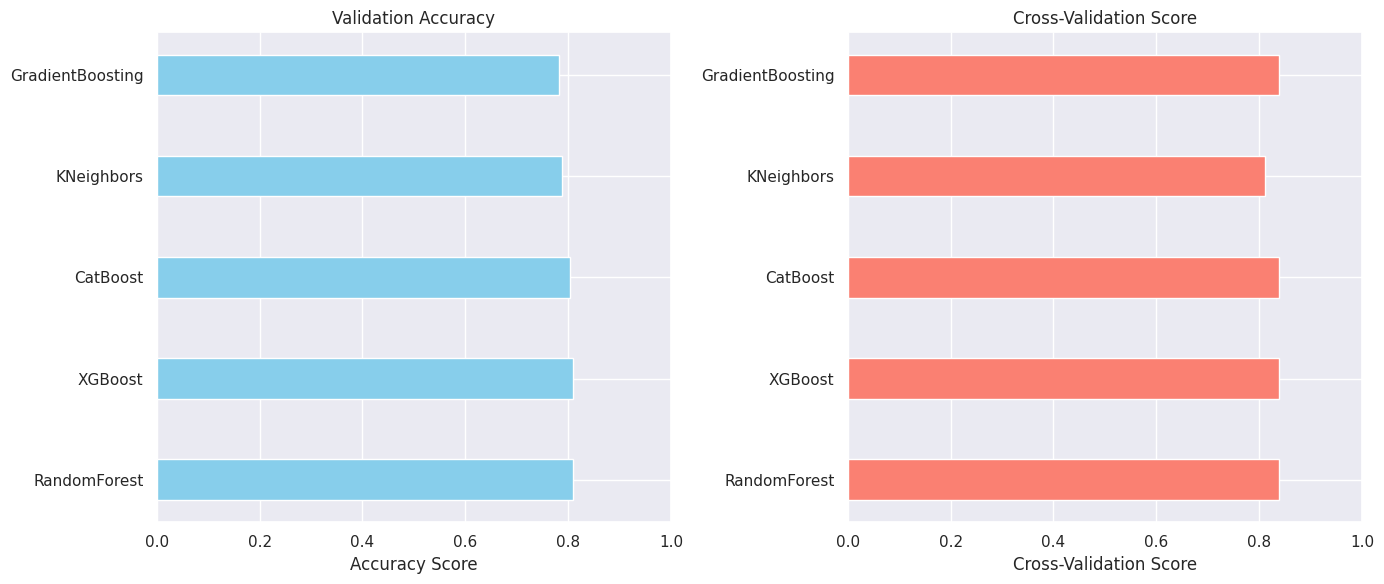

In [239]:
performance_df = pd.DataFrame(
    {
        "Model":model_names,
        "Accuracy":accuracy_scores,
        "Validation":validation_scores
    }
)

performance_df = performance_df.sort_values(by="Accuracy", ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].barh(
    y=performance_df['Model'],
    width=performance_df['Accuracy'],
    height=0.4, 
    align='center',
    color='skyblue'
)
axes[0].set_xlabel("Accuracy Score")
axes[0].set_title("Validation Accuracy")
axes[0].set_xlim(0, 1) 

axes[1].barh(
    y=performance_df['Model'],
    width=performance_df['Validation'],
    height=0.4,  
    align='center',
    color='salmon'
)
axes[1].set_xlabel("Cross-Validation Score")
axes[1].set_title("Cross-Validation Score")
axes[1].set_xlim(0, 1) 

plt.tight_layout()
plt.show()

# Test predictions

Let's start by creating an empty dictionary, `test_predictions`, which will store the predictions for each model on the test set.
Then we print our training accuracy of each model. 

In [237]:
test_predictions = {}

for model_name, model_info in best_models.items():
    best_model = model_info['model']
    
    predictions = best_model.predict(test)
    test_predictions[model_name] = predictions
    
    train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
    print(f"{model_name} training accuracy: {train_accuracy:.4f}")

RandomForest training accuracy: 0.9101
GradientBoosting training accuracy: 0.8708
KNeighbors training accuracy: 0.8581
XGBoost training accuracy: 0.9185
CatBoost training accuracy: 0.8385


Now we save our predictions in csv file for each model in submission compatible format.

In [238]:
model_names =['RandomForest','GradientBoosting','KNeighbors','XGBoost','CatBoost']
for name in model_names:
    submission = pd.DataFrame({"PassengerId":id_for_submission,"Survived":test_predictions[name]})
    submission.to_csv(f"submissions/{name}.csv",index=False)